# Pre-Processing Data

## Import Data
This data was collected through "Survey 1 - Rating Facebook Content Appropriateness"

In [40]:
# General Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import time

# SK Learn Libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics

# Other Libraries
from astropy.table import Table
from astropy.io import ascii

In [41]:
# Create Bag of Words Numpy Array
df = pd.read_csv("results_2.csv", delimiter=",")
df.head()

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,Q30,Q31,Q33,Q34,Q35,Q36,Q37,Q39,Q40,Q40 - Topics
0,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,...,Our Cyber Monday sale has been extended by 24 ...,Want to lose weight? Change your lifestyle? Ch...,Sometimes you just have to take news titles as...,Twitter's CEO Jack Dorsey is a fraud and has m...,Want some of the best news articles the Intern...,The Onion just cracks me up with its satirical...,Current speculation on who else might add thei...,"Given the above information about the study, a...","If you agree to participate, what is your Face...",Q40 - Topics
1,"{""ImportId"":""startDate"",""timeZone"":""America/De...","{""ImportId"":""endDate"",""timeZone"":""America/Denv...","{""ImportId"":""status""}","{""ImportId"":""ipAddress""}","{""ImportId"":""progress""}","{""ImportId"":""duration""}","{""ImportId"":""finished""}","{""ImportId"":""recordedDate"",""timeZone"":""America...","{""ImportId"":""_recordId""}","{""ImportId"":""recipientLastName""}",...,"{""ImportId"":""QID45""}","{""ImportId"":""QID46""}","{""ImportId"":""QID48""}","{""ImportId"":""QID49""}","{""ImportId"":""QID50""}","{""ImportId"":""QID51""}","{""ImportId"":""QID52""}","{""ImportId"":""QID56""}","{""ImportId"":""QID57_TEXT""}","{""ImportId"":""QID57_TEXT_f58cd698801b4d34abb899..."
2,2019-03-19 06:43:40,2019-03-19 06:49:04,IP Address,*******,100,324,True,2019-03-19 06:49:05,R_wMhb3SEJli90Dbb,*******,...,1,2,4,4,4,4,4,No,NaN,NaN
3,2019-03-19 06:42:36,2019-03-19 06:49:10,IP Address,*******,100,394,True,2019-03-19 06:49:11,R_32QsC3NJ0DgQk67,*******,...,1,5,1,7,1,2,1,No,NaN,NaN
4,2019-03-19 06:42:28,2019-03-19 06:49:33,IP Address,*******,100,425,True,2019-03-19 06:49:34,R_1H1ZNUvWTVv9TIF,*******,...,1,1,2,6,5,3,5,No,NaN,NaN


## Edit Data

Drop the first 151 rows of responses due to survey response issues that would violate research integrity.

Drop columns that do not contain information about question responses.

In [42]:
# Drop Rows
drop_rows = list(range(0, 63))
df = df.drop(drop_rows)
df = df.reset_index(drop=True)
df.head()

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,Q30,Q31,Q33,Q34,Q35,Q36,Q37,Q39,Q40,Q40 - Topics
0,2019-03-19 08:25:25,2019-03-19 08:37:17,IP Address,*******,100,712,True,2019-03-19 08:37:17,R_PMOkJbTXS2CwuAh,*******,...,1,1,1,1,1,1,1,Yes,NaN,NaN
1,2019-03-19 08:32:36,2019-03-19 08:38:01,IP Address,*******,100,325,True,2019-03-19 08:38:02,R_2rjQEcyQnxg4l4g,*******,...,2,7,3,3,5,6,6,No,NaN,NaN
2,2019-03-19 08:31:02,2019-03-19 08:39:11,IP Address,*******,100,488,True,2019-03-19 08:39:11,R_sIpFhrCMTdETotj,*******,...,4,4,4,5,4,2,2,No,NaN,NaN
3,2019-03-19 08:25:33,2019-03-19 08:40:16,IP Address,*******,100,883,True,2019-03-19 08:40:17,R_d72eWfjbUOcqGTT,*******,...,3,5,2,5,2,1,1,No,NaN,NaN
4,2019-03-19 08:39:19,2019-03-19 08:44:01,IP Address,*******,100,282,True,2019-03-19 08:44:02,R_3nAb3WpHbGRgBP5,*******,...,1,2,1,1,1,1,1,No,NaN,NaN


In [43]:
# Drop Columns
drop_columns = ['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress', 'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId', 'RecipientLastName', 'RecipientFirstName', 'RecipientEmail', 'ExternalReference', 'LocationLatitude', 'LocationLongitude', 'DistributionChannel', 'UserLanguage', 'Q39', 'Q40', 'Q40 - Topics', 'Q41']
df = df.drop(columns=drop_columns, axis=1)
df.head()

,Q3,Q4,Q5,Q6,Q7,Q10,Q12,Q14,Q16,Q18,...,Q27,Q28,Q29,Q30,Q31,Q33,Q34,Q35,Q36,Q37
0,2,6,5,1,1,5,1,6,1,5,...,1,3,2,1,1,1,1,1,1,1
1,4,7,6,1,4,3,1,1,1,3,...,1,7,7,2,7,3,3,5,6,6
2,6,7,6,4,2,7,4,6,5,7,...,2,6,6,4,4,4,5,4,2,2
3,5,7,4,1,1,5,3,3,2,3,...,1,3,6,3,5,2,5,2,1,1
4,3,3,3,4,1,5,1,1,1,1,...,1,3,1,1,2,1,1,1,1,1


In [44]:
# Replace NaN's with the mode
# df = df.fillna(df.mode().iloc[0])
df.dropna(inplace=True)
df.head()

,Q3,Q4,Q5,Q6,Q7,Q10,Q12,Q14,Q16,Q18,...,Q27,Q28,Q29,Q30,Q31,Q33,Q34,Q35,Q36,Q37
0,2,6,5,1,1,5,1,6,1,5,...,1,3,2,1,1,1,1,1,1,1
1,4,7,6,1,4,3,1,1,1,3,...,1,7,7,2,7,3,3,5,6,6
2,6,7,6,4,2,7,4,6,5,7,...,2,6,6,4,4,4,5,4,2,2
3,5,7,4,1,1,5,3,3,2,3,...,1,3,6,3,5,2,5,2,1,1
4,3,3,3,4,1,5,1,1,1,1,...,1,3,1,1,2,1,1,1,1,1


In [45]:
# Export edited data 
df.to_csv('results_2_edited.csv', index=False)

In [46]:
# Convert all data to integers
df = pd.read_csv("results_2_edited.csv", delimiter=",", dtype=int)
df = df.transpose()
index = df.index.values

### Isolate Community Standards

In [47]:
def isolate_data(a, b):
    data = df.iloc[a:b]
    return data, data.index.values

hate, hate_index = isolate_data(0, 5)
nudity, nudity_index = isolate_data(5, 10)
cruel, cruel_index = isolate_data(10, 15)
spam, spam_index = isolate_data(15, 20)
false, false_index = isolate_data(20, 25)

## Analyze Data

### Bar Graphs for Each Question

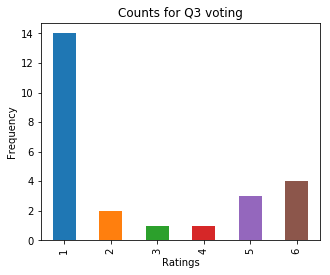

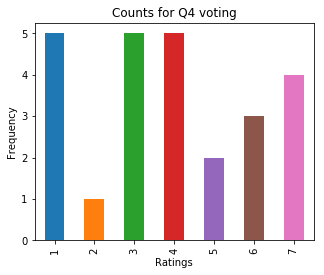

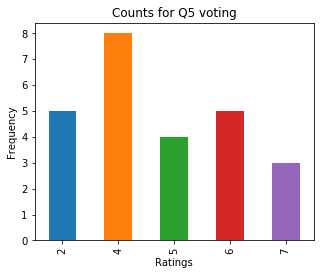

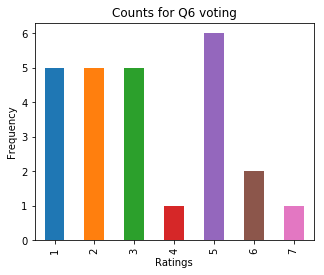

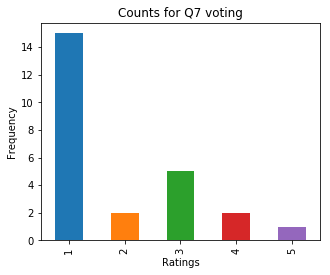

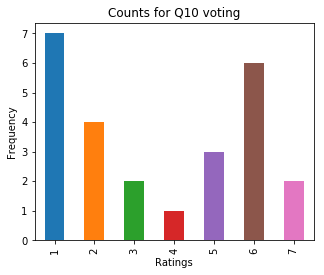

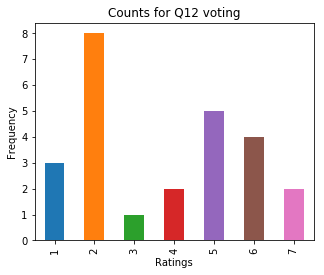

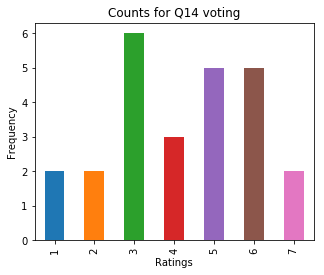

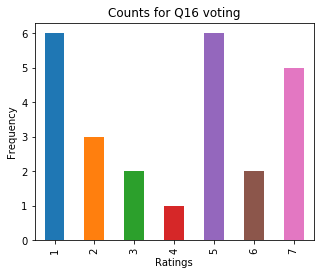

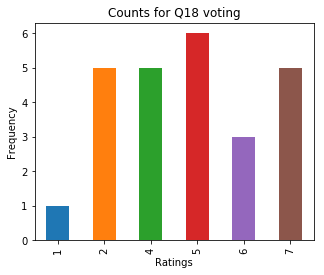

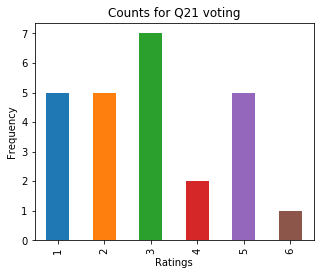

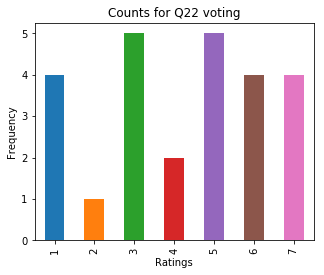

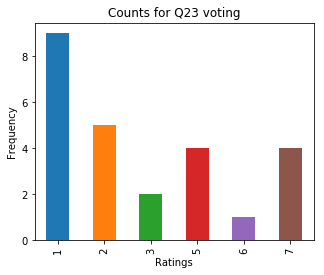

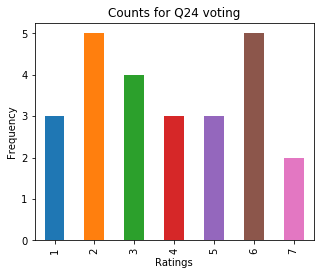

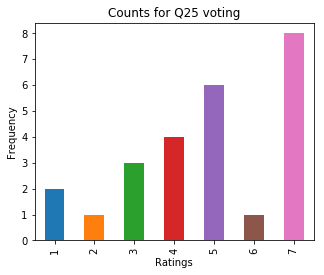

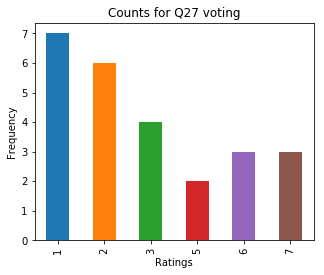

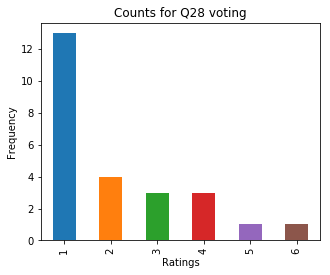

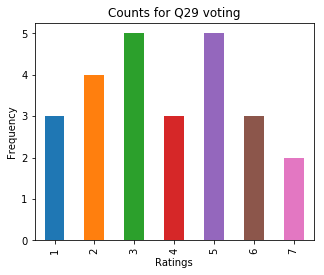

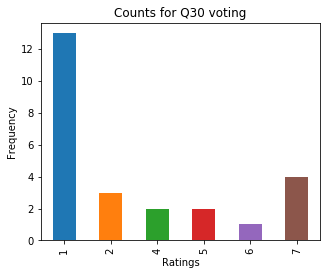

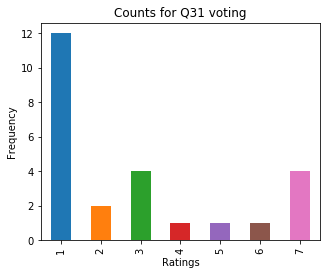

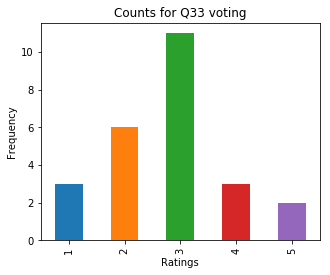

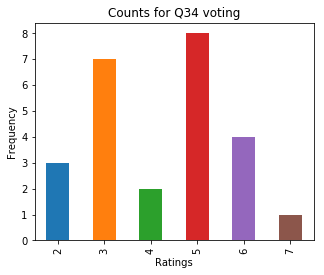

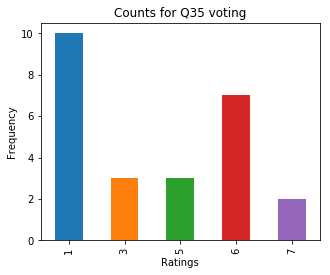

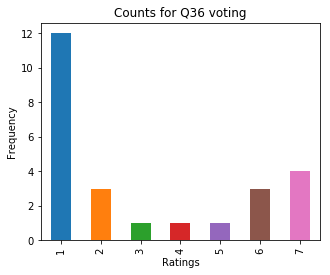

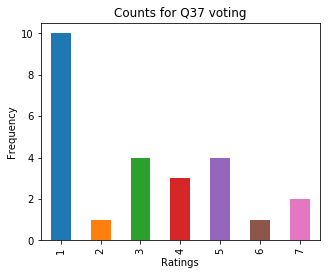

In [48]:
for i in range(len(index)):
    graph_title = 'Counts for %s voting' % index[i]
    ax = df.groupby([i]).size().plot(kind='bar', figsize=(5,4), title=graph_title)
    ax.set_xlabel("Ratings")
    ax.set_ylabel("Frequency")
    plt.savefig('Figures/%s_voting_bar_plot.png' % index[i], overwrite=True)
    plt.show()

### Means and Variances

In [49]:
# Define function for getting means and variances
def get_stat(data):
    means = []
    sds = []    
    for i in range(len(data)):
        m = np.round(np.mean(data.iloc[i]), decimals=4)
        sd = np.round(np.std(data.iloc[i]), decimals=4)
        means.append(m)
        sds.append(sd) 
    return means, sds

In [50]:
# Get means and standard deviations for overall dataset
means, sds = get_stat(df)   

# Get means and standard deviations for each Community Standard
hate_means, hate_sds = get_stat(hate)
nudity_means, nudity_sds = get_stat(nudity)
cruel_means, cruel_sds = get_stat(cruel)
spam_means, spam_sds = get_stat(spam)
false_means, false_sds = get_stat(false)

### Figures for Means and Variances

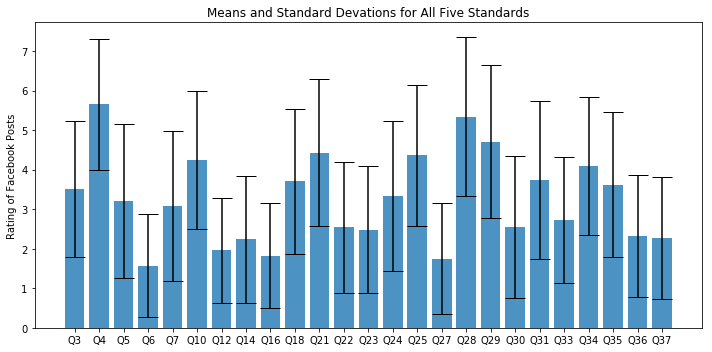

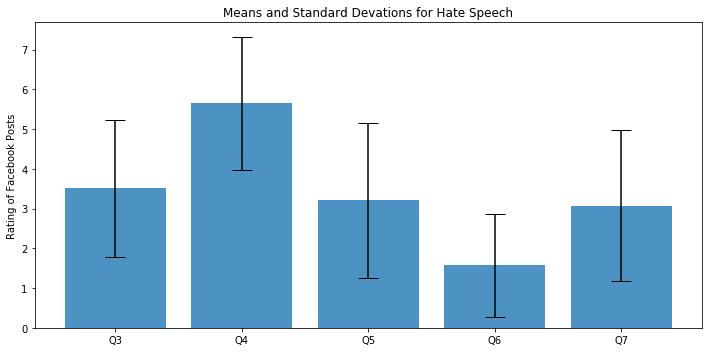

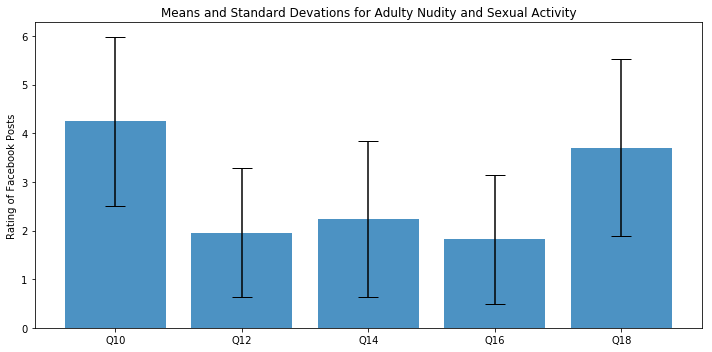

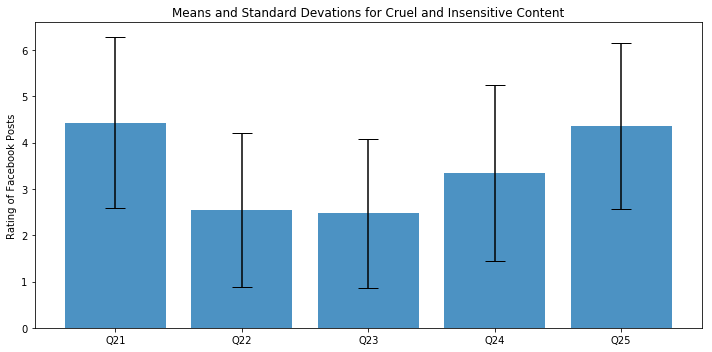

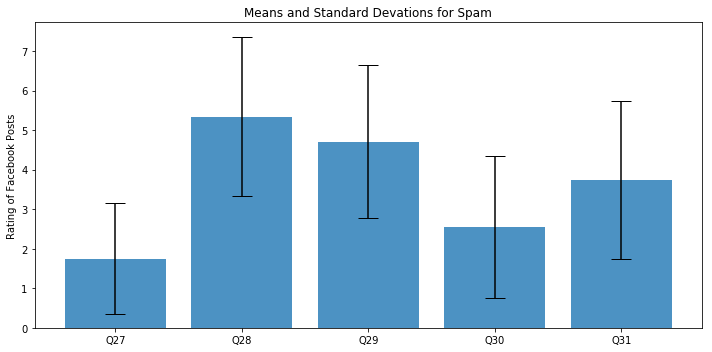

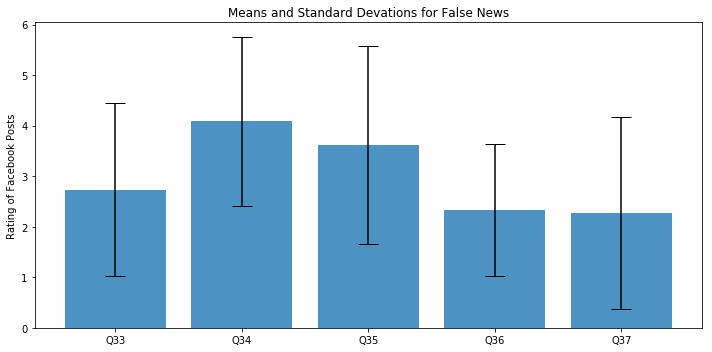

In [51]:
# Define function to create bar graph with error bars   
def plot_figs(index, means, sds, standard, file_name):
    fig = plt.figure(figsize=(10,5))
    plt.bar(index, means, yerr=sds, align='center', alpha=0.8, ecolor='black', capsize=10)
    plt.ylabel('Rating of Facebook Posts')
    plt.xticks(index)
    plt.title('Means and Standard Devations for %s' % standard)
    plt.tight_layout()
    plt.savefig('Figures/%s_bar_plot_with_error_bars.png' % file_name, overwrite=True)
    plt.show()

# Plot and save figures
plot_figs(index, means, sds, 'All Five Standards', 'all')  
plot_figs(hate_index, hate_means, hate_sds, 'Hate Speech', 'hate')
plot_figs(nudity_index, nudity_means, nudity_sds, 'Adulty Nudity and Sexual Activity', 'nudity')
plot_figs(cruel_index, cruel_means, cruel_sds, 'Cruel and Insensitive Content', 'cruel')
plot_figs(spam_index, spam_means, spam_sds, 'Spam', 'spam')
plot_figs(false_index, false_means, hate_sds, 'False News', 'false')

In [53]:
def create_stat_charts(index, means, sds, standard, file_name):
    t = Table([index, means, sds], names=('index', 'means', 'sds'), meta={'name': 'Table on Survey 1 %s Means and Variances' % file_name})
    ascii.write(t, 'Tables/table_of_%s_means_sds.csv' % file_name, format='csv', fast_writer=False, overwrite=True)
    
# Create charts with means and variances
create_stat_charts(index, means, sds, 'All', 'all')
create_stat_charts(hate_index, hate_means, hate_sds, 'Hate Speech', 'hate')
create_stat_charts(nudity_index, nudity_means, nudity_sds, 'Adult Nudity and Sexual Activity', 'nudity')
create_stat_charts(cruel_index, cruel_means, cruel_sds, 'Cruel and Insensitive Speech', 'cruel')
create_stat_charts(spam_index, spam_means, spam_sds, 'Spam', 'spam')
create_stat_charts(false_index, false_means, false_sds, 'False News', 'false')